<a href="https://colab.research.google.com/github/6FAN/SkLearn/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16Mar2024

In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
print(dir(sklearn))

['__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_distributor_init', 'base', 'clone', 'config_context', 'exceptions', 'externals', 'get_config', 'logger', 'logging', 'os', 'random', 'set_config', 'setup_module', 'show_versions', 'sys', 'utils']


# 1: Linear Regression [11:42]

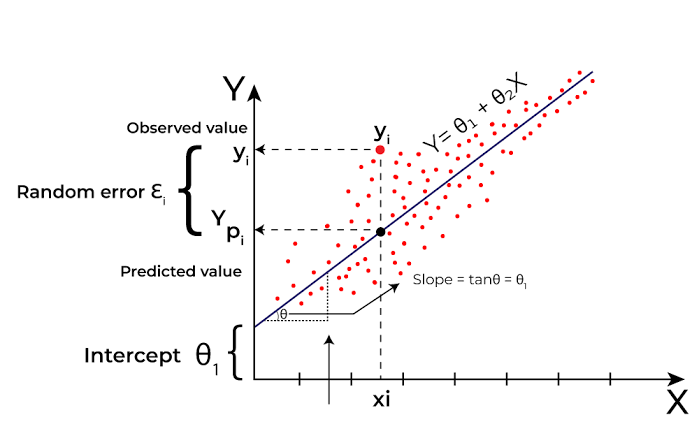

x = xi = height

y = yi = weight

    m = dy/dx => y = mx + c => y = θ2X + θ1
    
    slope m = co.efficient
    
    c = θ1 = Intercept


* Linear Regression is a quiet and the simplest statistical regression method used for predictive analysis in machine Learning.
* These are supervised algorithm used in deep Learning.
* Linear Regression is a statistical method used to analyze the relationship between a dependent variable and one or more independent variables.
* In linear regression, the relationship between the variables is modeled useing a linear equation.
    * there are seversl type of linear regression
        * simple linear regression :- single input
        * multiple linear regression :- many input
        * polynomial regression :- many input
* Slop represents the change in the dependent variable for each unit change in the independent variable.
* while the intercept represents the predicted value of the **dependent variable (y)** when the **independent variable (x)** is zero

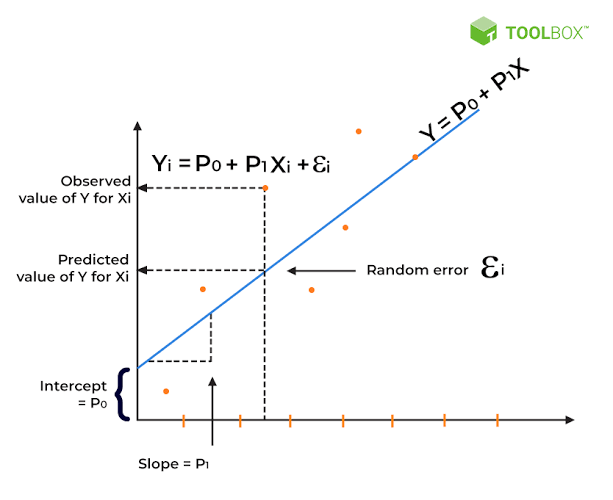

* **εi** is the error of the estimate, or how much variation there is in our estimate of the regression coefficient.
* εi = y(predicted value) - y(Actual Value)

# 2: Coding[52:19]

In [ ]:
# Height is independent and input
# Weight is dependent and output
df = pd.read_csv('DOC-20240317-WA0039.csv')
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('seaborn')

In [ ]:
df.shape

(15, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [ ]:
df.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [ ]:
#checking null values
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [ ]:
df.columns

Index(['Height', 'Weight'], dtype='object')

Text(0.5, 1.0, 'HEIGHT WEIGHT ANALAYSIS')

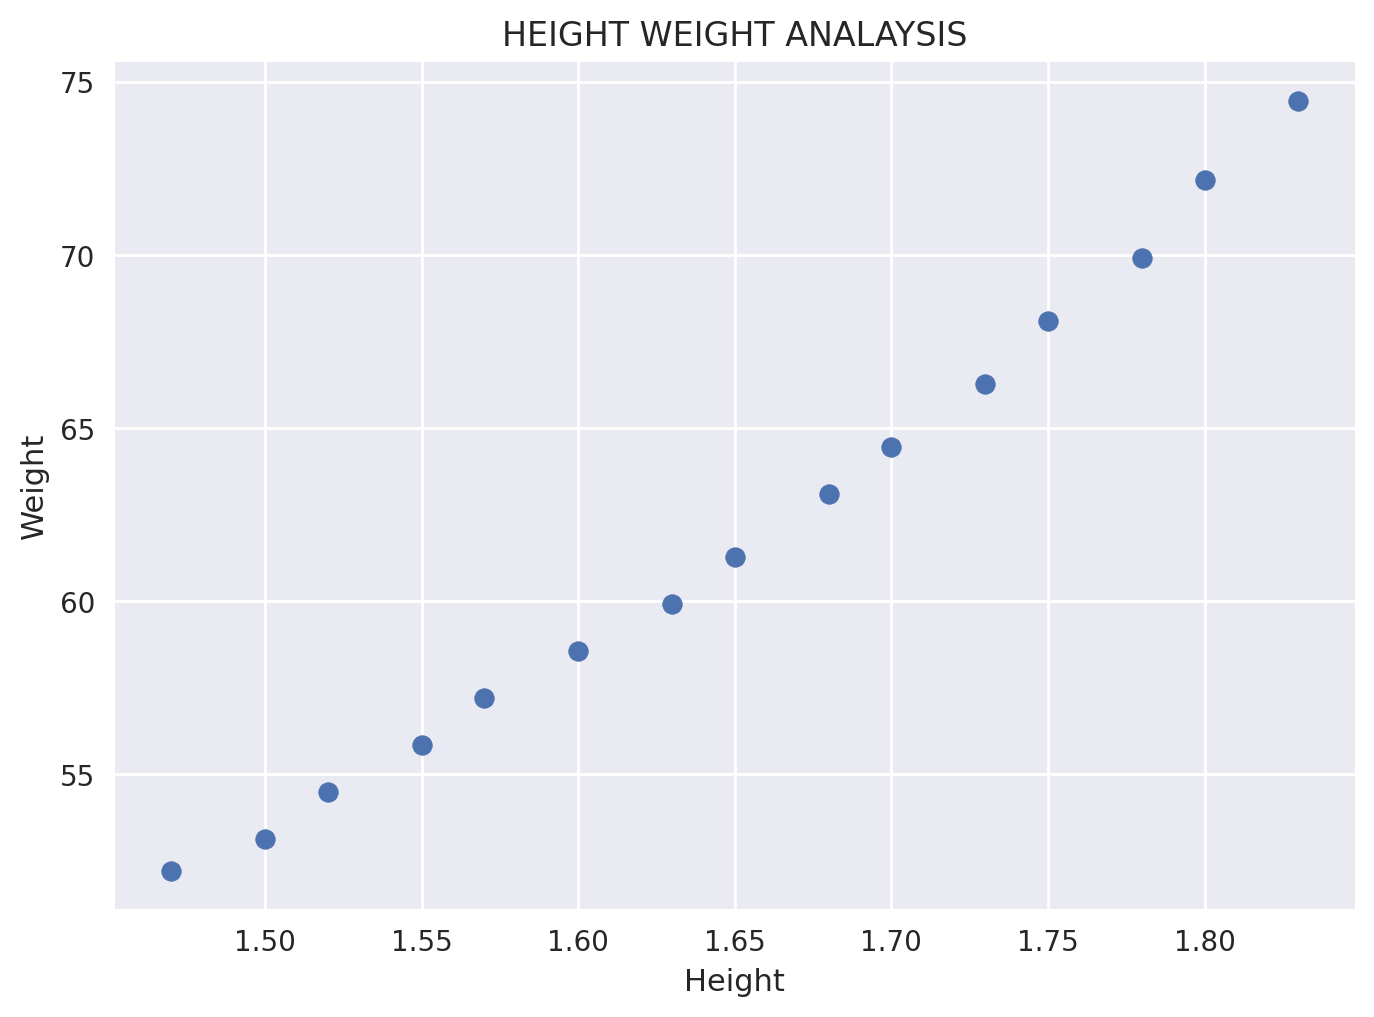

In [ ]:
plt.scatter(data=df, x="Height", y='Weight')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title('HEIGHT WEIGHT ANALAYSIS')

In [ ]:
# x is Height independent variable
x = df.iloc[:, 0]
x

0     1.47
1     1.50
2     1.52
3     1.55
4     1.57
5     1.60
6     1.63
7     1.65
8     1.68
9     1.70
10    1.73
11    1.75
12    1.78
13    1.80
14    1.83
Name: Height, dtype: float64

In [ ]:
# y is a target variable
# y is output
# y is Weight
# y is a dependent variable
y = df.iloc[:, -1]
y

0     52.21
1     53.12
2     54.48
3     55.84
4     57.20
5     58.57
6     59.93
7     61.29
8     63.11
9     64.47
10    66.28
11    68.10
12    69.92
13    72.19
14    74.46
Name: Weight, dtype: float64

# 3: Train test split[1:14:20]

* we need to split our dataset into training and testing sets.
* Train more data
* test less data
* data = 70% 30%, 80% 20%, 75% 25% and 50% 50% this metrod is called **parado principle**


**train_test_split(arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.**

In [ ]:
from sklearn.model_selection import train_test_split
# arrays is x and y
# test_size is a 25% of data taken
# random_state is take any number 21
x_train,x_test,y_train,y_test = train_test_split(
    x, y, test_size=0.3, random_state=21)

In [ ]:
x_train

1     1.50
2     1.52
12    1.78
3     1.55
13    1.80
11    1.75
0     1.47
4     1.57
8     1.68
9     1.70
Name: Height, dtype: float64

In [ ]:
x_test

14    1.83
5     1.60
7     1.65
10    1.73
6     1.63
Name: Height, dtype: float64

In [ ]:
y_train

1     53.12
2     54.48
12    69.92
3     55.84
13    72.19
11    68.10
0     52.21
4     57.20
8     63.11
9     64.47
Name: Weight, dtype: float64

In [ ]:
y_test

14    74.46
5     58.57
7     61.29
10    66.28
6     59.93
Name: Weight, dtype: float64

# 4: LinearRegression [1:28:17]

# Error

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
# Calling a fit function
linreg.fit(x_train,y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

x_train = x_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)
# Calling a fit function
linreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# intercept_
print(linreg.intercept_)

[-36.41317073]


In [ ]:
# Coef
print(linreg.coef_)

[[59.72865854]]


In [ ]:
#Predicted data
x_test = np.array(x_test).reshape(-1, 1)
ypredict = linreg.predict(x_test)
ypredict

array([[72.89027439],
       [59.15268293],
       [62.13911585],
       [66.91740854],
       [60.94454268]])

In [ ]:
#actual data
y_test

14    74.46
5     58.57
7     61.29
10    66.28
6     59.93
Name: Weight, dtype: float64

# 5: εi (error)[1:33:25]

In [ ]:
y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
err = y_test - ypredict
err

array([[ 1.56972561],
       [-0.58268293],
       [-0.84911585],
       [-0.63740854],
       [-1.01454268]])

Text(0, 0.5, 'WEIGHT')

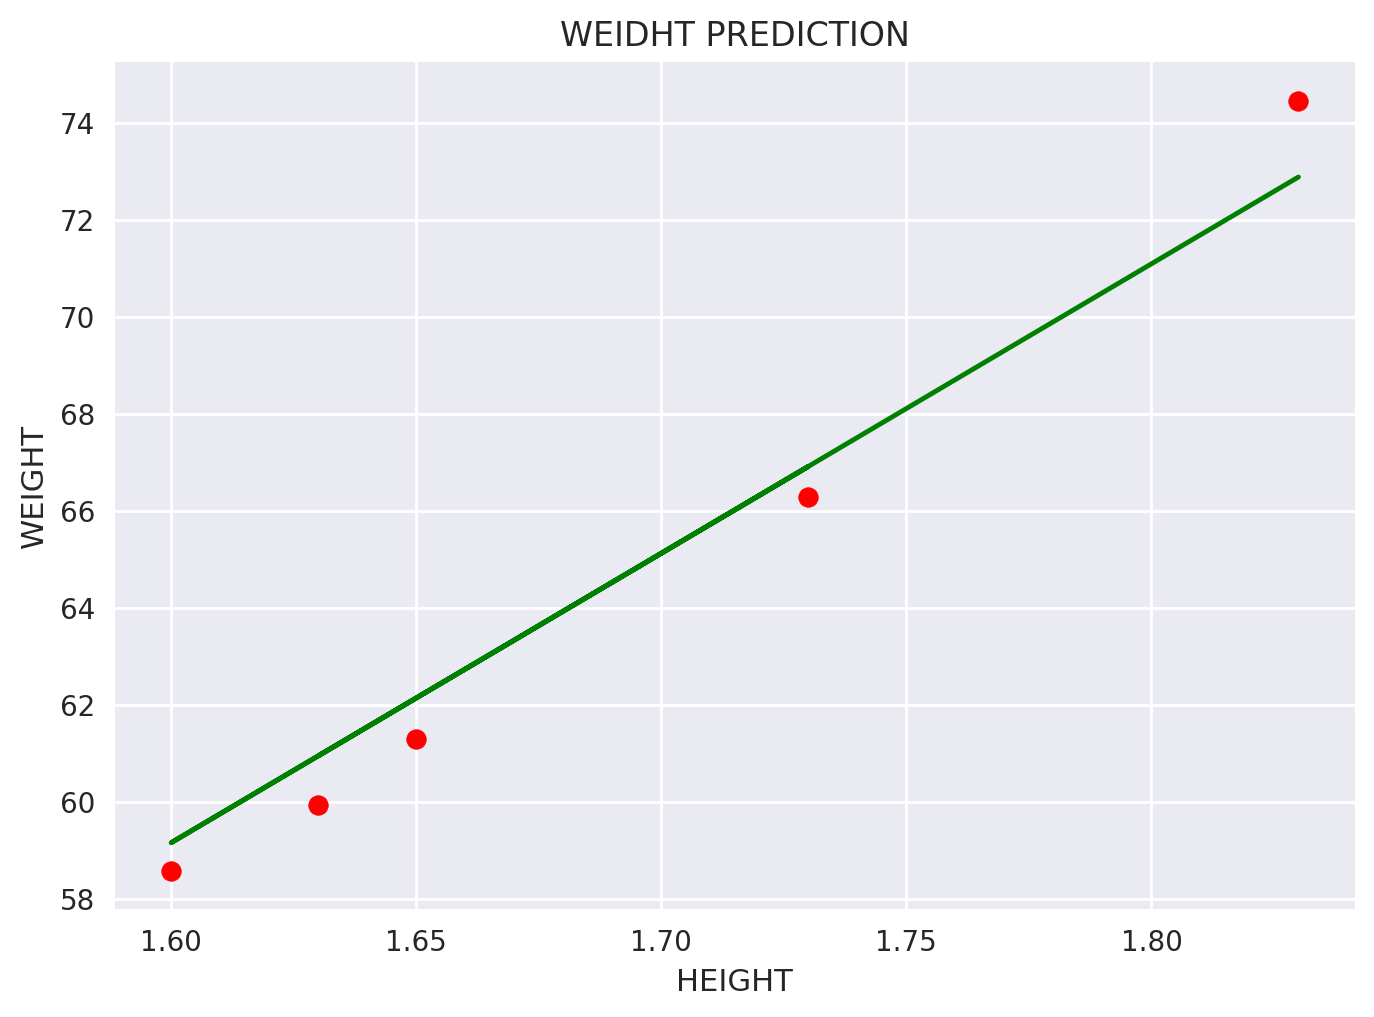

In [ ]:
#actual data
plt.scatter(x_test, y_test, color='red')
# predicted data
plt.plot(x_test, ypredict, color='green')
plt.title("WEIDHT PREDICTION")
plt.xlabel("HEIGHT")
plt.ylabel("WEIGHT")

# 6: Evaluation Metrics[1:35:00]

* The objective of Linear Regression is to find a line that minimizes the prediction error of all the data points.
* To minimizes the Error
    * Mean Squared Error (MSE)
    * Mean Absolute Error (MAE)
    * Root Mean Squared Error (RMSE)
    * R-Squared or Coefficient

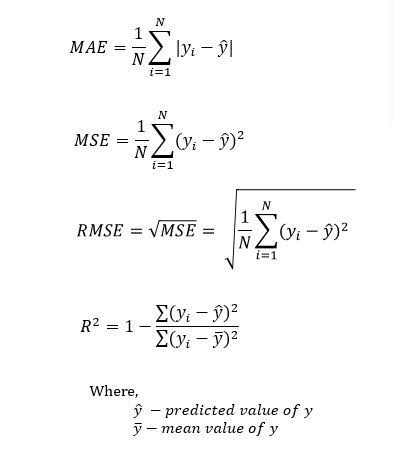

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, ypredict)
print(f"Mean Absolute Error : {MAE}")
MSE = metrics.mean_squared_error(y_test, ypredict)
print(f'Mean Squared Error : {MSE}')
RMSE = np.sqrt(MSE)
print(F'Root Mean Squared Error : {RMSE}')

Mean Absolute Error : 0.9306951219512143
Mean Squared Error : 0.9920284228137952
Root Mean Squared Error : 0.9960062363327828


In [ ]:
R2 = metrics.r2_score(y_test, ypredict)
print(f'The R2 score is : {R2*100}%')

The R2 score is : 97.04661539074839%
